**Research Problem from Renstra Dinas Pekerjaan Umum dan Penataan Ruang Kota Bogor Tahun 2020-2024** 


Kepadatan Lalu Lintas Jalan; Padatnya lalu lintas jalan menimbulkan penumpukan kendaraan terutama pada ruas-ruas jalan utama yang diakibatkan pembangunan sistem transportasi belum terimplementasi optimal.

**Research Question**:
Bagaimana prediksi kondisi kemacetan jalan akibat dari padatnya lalu lintas ?

**Data used** : aggregate_median_irregularities_Kota Bogor

# Data Understanding

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df2 = pd.read_csv("aggregate_median_irregularities_Kota Bogor.csv", index_col=0)


In [5]:
df2.head()

,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,jam_level,median_length,median_delay_seconds,median_regular_speed,total_records,cause_type,median_seconds,median_speed,date,median_jam_level,id,geometry
time,,,,,,,,,,,,,,,
2022-07-06 09:00:00.000,32.71,KOTA BOGOR,N9 Jalan Raya Dramaga,4,1878.0,689.0,13.775000,18,NaN,856.5,7.340,2022-07-06,4.0,1492793,"MULTILINESTRING ((106.738284 -6.568848, 106.73..."
2022-07-06 09:00:00.000,32.71,KOTA BOGOR,N9 Jalan Raya Dramaga,3,1226.0,339.5,14.400000,6,NaN,447.0,9.995,2022-07-06,3.0,1492792,"MULTILINESTRING ((106.73546 -6.565547, 106.735..."
2022-07-06 10:00:00.000,32.71,KOTA BOGOR,Kapten Yusuf,3,1399.0,517.0,18.150000,2,NaN,707.0,7.110,2022-07-06,3.0,1492794,"LINESTRING (106.785538 -6.61574, 106.785797 -6..."
2022-07-06 10:00:00.000,32.71,KOTA BOGOR,N9 Underpass KH Soleh Iskandar,4,627.0,525.0,23.900002,20,NaN,573.5,3.930,2022-07-06,4.0,1492797,"MULTILINESTRING ((106.800519 -6.562005, 106.80..."
2022-07-06 10:00:00.000,32.71,KOTA BOGOR,N9 Jalan Raya Dramaga,4,1420.0,623.0,11.710000,19,NaN,734.0,6.560,2022-07-06,4.0,1492796,"MULTILINESTRING ((106.739572 -6.570715, 106.73..."


Check Street Data

In [6]:
df2['street'].unique()

array(['N9 Jalan Raya Dramaga', 'Kapten Yusuf',
       'N9 Underpass KH Soleh Iskandar', 'N9 Jalan Raya Ciawi',
       'Exit Baranangsiang', 'Binamarga', 'N9 Jalan Raya Pajajaran',
       'Jenderal Ahmad Yani', 'Pandawa Raya', 'Paledang',
       'Kapten Muslihat', 'N9 Ir Haji Juanda', 'N8 Jalan Raya Bogor',
       'Tol Lingkar Luar Bogor', 'Jalan R3 Katulampa',
       'Brigjen Saptadji Hadi Prawira', 'N9 Raden KH Abdullah bin Nuh',
       'Letjen Ibrahim Adjie', 'N9 Jalan Raya Tajur', 'Surya Kencana',
       'Laladon Raya', 'Mayjen Ishak Djuarsa', 'N9 KH Soleh Iskandar',
       'Pahlawan', 'Ence Sumartadireja',
       'KH Soleh Iskandar (Jalur Lambat)', 'Siliwangi',
       'N9 Jalak Harupat', 'Jenderal Sudirman', 'Pajajaran Indah 5',
       'Ciomas Raya', 'Cilebut Raya', 'Tol Jagorawi', 'N9 KS Tubun',
       'Dr Sumeru', 'TB M Falak', 'Jalan Empang', 'Semplak Raya',
       'Cimanggu Kaum', 'Atang Sanjaya', 'N6 Jalan Raya Baru',
       'Exit 6: Yasmin/Dramaga/Parung', 'Jalan Lingkar Dra

In [7]:
df2['jam_level'].unique()

array([4, 3, 2, 1])

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4051 entries, 2022-07-06 09:00:00.000 to 2022-09-04 21:00:00.000
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   kemendagri_kabupaten_kode  4051 non-null   float64
 1   kemendagri_kabupaten_nama  4051 non-null   object 
 2   street                     4051 non-null   object 
 3   jam_level                  4051 non-null   int64  
 4   median_length              4051 non-null   float64
 5   median_delay_seconds       4051 non-null   float64
 6   median_regular_speed       4051 non-null   float64
 7   total_records              4051 non-null   int64  
 8   cause_type                 0 non-null      float64
 9   median_seconds             4051 non-null   float64
 10  median_speed               4051 non-null   float64
 11  date                       4051 non-null   object 
 12  median_jam_level           4051 non-null   float64
 13  id          

# **Quality**

Delete NaN rows in table

In [7]:
df2[df2['street']!='NaN'].isnull().sum()

kemendagri_kabupaten_kode       0
kemendagri_kabupaten_nama       0
street                          0
jam_level                       0
median_length                   0
median_delay_seconds            0
median_regular_speed            0
total_records                   0
cause_type                   4051
median_seconds                  0
median_speed                    0
date                            0
median_jam_level                0
id                              0
geometry                        0
dtype: int64

In [10]:
df2['street']

time
2022-07-06 09:00:00.000             N9 Jalan Raya Dramaga
2022-07-06 09:00:00.000             N9 Jalan Raya Dramaga
2022-07-06 10:00:00.000                      Kapten Yusuf
2022-07-06 10:00:00.000    N9 Underpass KH Soleh Iskandar
2022-07-06 10:00:00.000             N9 Jalan Raya Dramaga
                                        ...              
2022-09-04 19:00:00.000               N9 Jalan Raya Ciawi
2022-09-04 19:00:00.000             N9 Jalan Raya Dramaga
2022-09-04 19:00:00.000                      Kapten Yusuf
2022-09-04 20:00:00.000             N9 Jalan Raya Dramaga
2022-09-04 21:00:00.000             N9 Jalan Raya Dramaga
Name: street, Length: 4051, dtype: object

[EDA] Checking relationship of street with jam level

In [11]:
df2.describe(include='all')

,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,jam_level,median_length,median_delay_seconds,median_regular_speed,total_records,cause_type,median_seconds,median_speed,date,median_jam_level,id,geometry
count,4.051000e+03,4051,4051,4051.000000,4051.000000,4051.000000,4051.000000,4051.000000,0.0,4051.000000,4051.000000,4051,4051.000000,4.051000e+03,4051
unique,NaN,1,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61,NaN,NaN,3824
top,NaN,KOTA BOGOR,N9 Jalan Raya Dramaga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-07-16,NaN,NaN,"MULTILINESTRING ((106.739572 -6.570715, 106.73..."
freq,NaN,4051,768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199,NaN,NaN,5
mean,3.271000e+01,NaN,NaN,3.542582,1232.675389,567.778697,20.019296,15.730190,NaN,688.843125,7.244319,NaN,3.542582,1.543578e+06,NaN
std,7.106305e-15,NaN,NaN,0.603571,732.053520,280.972259,11.149602,17.365754,NaN,297.049553,4.563263,NaN,0.603571,2.515182e+04,NaN
min,3.271000e+01,NaN,NaN,1.000000,500.000000,60.000000,4.050000,1.000000,NaN,118.000000,0.880000,NaN,1.000000,1.492792e+06,NaN
25%,3.271000e+01,NaN,NaN,3.000000,747.000000,381.500000,14.017500,4.000000,NaN,493.000000,4.280000,NaN,3.000000,1.524546e+06,NaN
50%,3.271000e+01,NaN,NaN,4.000000,1072.000000,541.000000,18.345001,10.000000,NaN,661.000000,6.220000,NaN,4.000000,1.546230e+06,NaN
75%,3.271000e+01,NaN,NaN,4.000000,1420.000000,701.000000,23.277501,21.000000,NaN,839.000000,8.920000,NaN,4.000000,1.566736e+06,NaN


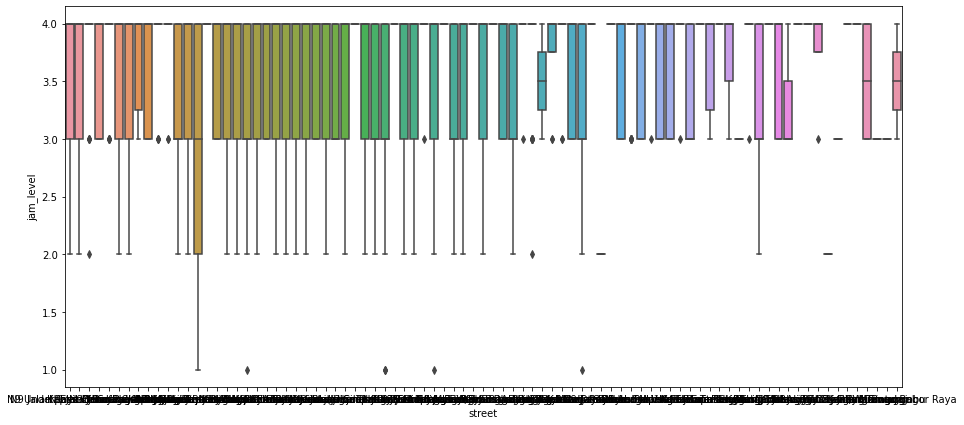

In [15]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='street',y='jam_level',data=df2)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 98.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 95.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 81.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 92.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 81.8% of the points cannot be placed; y

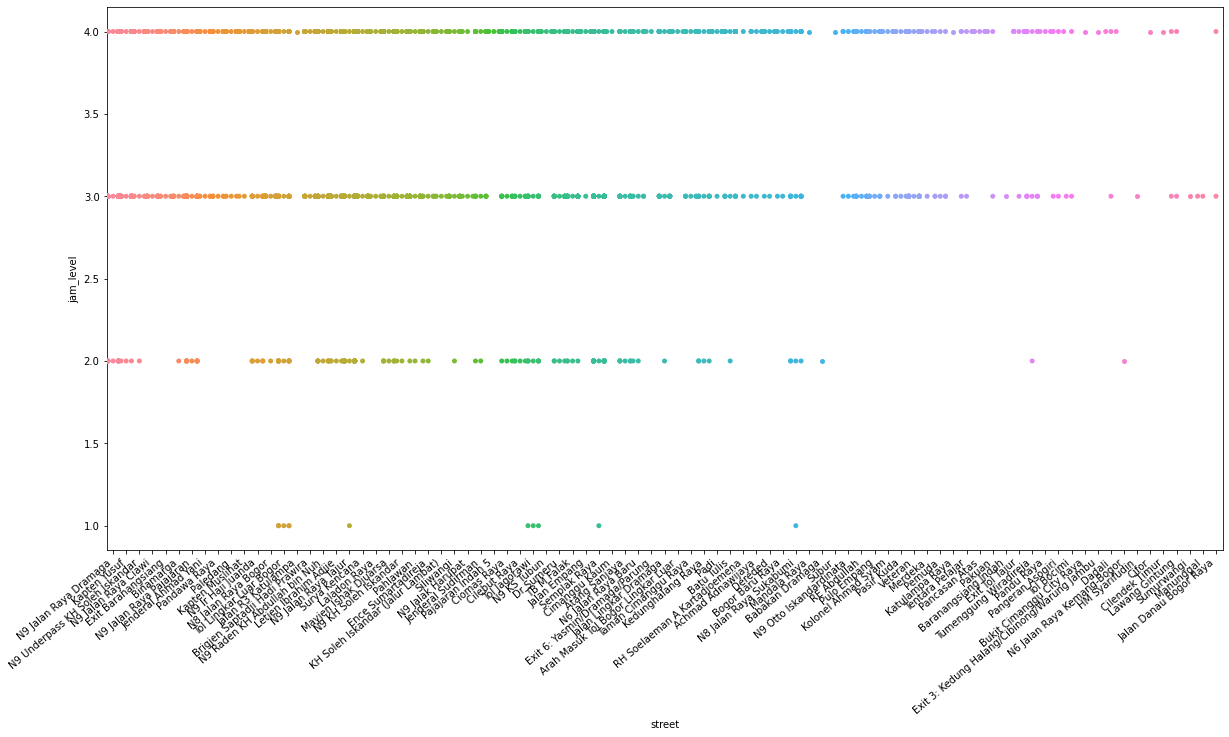

In [16]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='street',y='jam_level',data=df2)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Extracting Training Data

In [76]:
x=df2[['street']]
y=df2['jam_level']


print("shape of X = ", x.shape)
print("shape of y = ", y.shape)

shape of X =  (4051, 1)
shape of y =  (4051,)


In [62]:
x['street'].describe()

count                      4051
unique                       85
top       N9 Jalan Raya Dramaga
freq                        768
Name: street, dtype: object

**Model** 

Splitting the data in 4 parts:

In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)


print("shape of X_train = ", x_train.shape)
print("shape of y_train = ", y_train.shape)
print("shape of X_test = ", x_test.shape)
print("shape of y_test = ", y_test.shape)

shape of X_train =  (3240, 1)
shape of y_train =  (3240,)
shape of X_test =  (811, 1)
shape of y_test =  (811,)


In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer 
from sklearn.pipeline import make_pipeline

r2_score : "Coefficient of determination also called as R2 score is used to evaluate the performance of a linear regression model." It is the amount of the variation in the output dependent attribute which is predictable from the input independent variable(s). Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a score of 0.0.

OneHotEncoder: Machines understand numbers, not text. We need to convert each text category to numbers in order for the machine to process them using mathematical equations.That’s primarily the reason we need to convert categorical columns to numerical columns so that a machine learning algorithm understands it. This process is called categorical encoding. One-Hot Encoding is another popular technique for treating categorical variables. It simply creates additional features based on the number of unique values in the categorical feature. Every unique value in the category will be added as a feature. One-Hot Encoding is the process of creating dummy variables.

Pipeline : Machine Learning projects need iterative progress. For example, we clean and prepare data for modeling with transforming to the proper format, run the model, get results, improve the model/change the model and work on feature engineering, get new results, compare them with other results, etc. It is not easy and smart to do every step again and again. To solve this problem, we can use a pipeline to integrate steps of machine learning workflow. Pipelines are super useful for transforming and training data quickly.

In [68]:
ohe = OneHotEncoder()
ohe.fit(x[['street']]) 

OneHotEncoder()

In [74]:
ohe

OneHotEncoder()

In [69]:
ohe.categories_ 

[array(['Achmad Adnawijaya', 'Arah Masuk Tol Bogor Lingkar Luar',
        'Atang Sanjaya', 'Babakan Dramaga', 'Baranangsiang Indah',
        'Batu Tulis', 'Binamarga', 'Bogor Baru Raya',
        'Brigjen Saptadji Hadi Prawira', 'Bukit Cimanggu City Raya',
        'Cifor', 'Cilebut Raya', 'Cilendek Timur', 'Cimanggu Kaum',
        'Ciomas Raya', 'Dadali', 'Dereded', 'Dr Sumeru',
        'Ence Sumartadireja',
        'Exit 3: Kedung Halang/Cibinong/Warung Jambu',
        'Exit 6: Yasmin/Dramaga/Parung', 'Exit Baranangsiang',
        'Exit Tol Tajur', 'HM Syarifudin', 'Jalan Danau Bogor Raya',
        'Jalan Empang', 'Jalan Lingkar Dramaga', 'Jalan R3 Katulampa',
        'Jenderal Ahmad Yani', 'Jenderal Sudirman',
        'KH Soleh Iskandar (Jalur Lambat)', 'Kapten Muslihat',
        'Kapten Yusuf', 'Katulampa Raya', 'Kedunghalang Raya',
        'Kolonel Ahmad Syam', 'Laladon Raya', 'Lawang Gintung',
        'Letjen Ibrahim Adjie', 'Mandala Raya', 'Manunggal',
        'Mayjen Ishak Djuars

In [87]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['street']), remainder='passthrough')

In [88]:
lr = LinearRegression()

In [89]:
pipe = make_pipeline(column_trans,lr) # Made pipeline and saved it in variable named pipe 

In [90]:
pipe.fit(x_train, y_train) # Trained the pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Achmad Adnawijaya', 'Arah Masuk Tol Bogor Lingkar Luar',
       'Atang Sanjaya', 'Babakan Dramaga', 'Baranangsiang Indah',
       'Batu Tulis', 'Binamarga', 'Bogor Baru Raya',
       'Brigjen Saptadji Hadi Prawira', 'Bukit Cimanggu City Raya',
       'Cifor', 'Ci...
       'Pancasan Atas', 'Pandawa Raya', 'Pandu Raya', 'Pangeran Asogiri',
       'Pasir Kuda', 'Pemuda', 'Pulo Empang', 'RE Abdullah',
       'RH Soelaeman A Kartadjoemena', 'Semplak Raya', 'Siliwangi',
       'Subur', 'Sumurwangi', 'Surya Kencana', 'TB M Falak',
       'Taman Cimanggu Raya', 'Tentara Pelajar', 'Tol Bocimi',
       'Tol Jagorawi', 'Tol Lingkar Luar Bogor', 'Tumenggung Wiradireja',
       'Veteran'], dtype=object)]),
                                               

In [91]:
y_pred = pipe.predict(x_test)

In [92]:
r2_score(y_test, y_pred) # Calculated the score of prediction. 

0.04246454477737982

In [97]:
scores=[] # Made list named as scores. 

for i in range(1000):

    x_train, x_test, y_train, y_test = train_test_split ( x, y, test_size=0.1, random_state=i) # We have run the loop by using different random state. 

    lr=LinearRegression()

    pipe=make_pipeline(column_trans,lr)

    pipe.fit(x_train,y_train)

    y_pred=pipe.predict(x_test)

    scores.append(r2_score(y_test,y_pred))

In [98]:
np.argmax(scores) # This finds the value where score was the highest

411

In [99]:
scores[np.argmax(scores)] 

0.16018588996988248

In [100]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=np.argmax(scores))

lr=LinearRegression()

pipe=make_pipeline(column_trans,lr)

pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)

r2_score(y_test,y_pred)

0.16018588996988248

In [101]:
df2['street'].value_counts().head(15)

N9 Jalan Raya Dramaga           768
N9 Jalan Raya Tajur             296
Semplak Raya                    253
Kapten Yusuf                    215
N9 Raden KH Abdullah bin Nuh    210
N9 Jalan Raya Pajajaran         194
N8 Jalan Raya Bogor             180
Surya Kencana                   125
Pahlawan                        108
Kapten Muslihat                 100
TB M Falak                       95
Letjen Ibrahim Adjie             90
Mayjen Ishak Djuarsa             80
N9 Jalan Raya Ciawi              78
Tol Lingkar Luar Bogor           67
Name: street, dtype: int64

In [109]:
street = input("Input street name: ")

PredictedStreet = pipe.predict(pd.DataFrame(columns=x_test.columns,data=np.array([street]).reshape(1,1)))

print("Predicted street is ", round(PredictedStreet[0],2))

Input street name: N9 Jalan Raya Dramaga
Predicted street is  3.54
